# Imports

In [2]:
import pandas as pd
import numpy as np
import os
import json
import cv2
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib
import matplotlib.pyplot as plt
import xgboost as xgb
import webcolors
import cv2
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from ast import literal_eval
%matplotlib inline

edited_color_dict = {'#ffa500': 'orange',
 '#000000': 'black',
 '#0000ff': 'blue',
 '#008000': 'green',
 '#808080': 'gray',
 '#800000': 'maroon',
 '#000080': 'navy',
 '#808000': 'olive',
 '#ff0000': 'red',
 '#008080': 'teal',
 '#ffffff': 'white',
 '#ffff00': 'yellow'}


#Final List of labels
"""Dress
Heels
Shirt
Shoe
Skirt
Tank top
T-shirt
Coat
Jeans
Shorts"""

list_of_labels_for_application = ['Dress',
'Heels',
'Shirt',
'Shoe',
'Skirt',
'Tank top',
'T-shirt',
'Coat',
'Jeans',
'Shorts',]
# Save list for application
with open('list_of_labels_for_application', 'wb') as fp:
    pickle.dump(list_of_labels_for_application, fp)

# Get dict of required "categoryid"
cat_string = """3 Dresses<br>
4 Day Dresses<br>
5 Cocktail Dresses<br>
6 Gowns<br>
7 Skirts<br>
8 Mini Skirts<br>
9 Knee Length Skirts<br>
10 Long Skirts<br>
11 Tops<br>
21 T-Shirts<br>
24 Coats<br>
25 Jackets<br>
27 Jeans<br>
28 Pants<br>
29 Shorts<br>
30 Suits<br>
41 Shoes<br>
42 Boots<br>
43 Pumps<br>
49 Sneakers<br>
343 Men's Tank Tops<br>
104 Tank Tops<br>
236 Blazers<br>
237 Skinny Jeans<br>
238 Bootcut Jeans<br>
239 Wide Leg Jeans<br>
240 Boyfriend Jeans<br>
255 Activewear Shorts<br>
261 Ankle Booties<br>
262 Mid Calf Boots<br>
263 Knee High Boots<br>
268 Athletic Shoes<br>
272 Men's Shirts<br>
275 Men's T-Shirts<br>
277 Men's Sportcoats & Blazers<br>
278 Men's Jeans<br>
280 Men's Shorts<br>
281 Men's Suits<br>
288 Men's Activewear Shorts<br>
291 Men's Shoes<br>
292 Men's Boots<br>
296 Men's Dress Shoes<br>
297 Men's Sneakers<br>
298 Men's Athletic Shoes<br>
309 Activewear Tank Tops<br>
310 Straight Leg Jeans<br>
342 Men's Polos<br>
4452 Flared Jeans<br>
4454 Men's Casual Shirts<br>
4455 Men's Coats<br>
4456 Men's Jackets<br>
4516 Wedding Dresses<br>
341 Men's Dress Shirts<br>"""

correction_hashmap_polyvore = {"Dresses" : "Dress",
                              "Day Dresses" : "Dress",
                               "Wedding Dresses" : "Dress",
                              "Cocktail Dresses" : "Dress",
                              "Gowns" : "Dress",
                              "High heels" : "Heels",
                              "Sandal" : "Heels",
                               "Pumps" : "Heels",
                              "Dress shirt" : "Shirt",
                               "Men's Shirts" : "Shirt",
                               "Men's Dress Shirts" : "Shirt",
                               "Men's Casual Shirts" : "Shirt",
                              "Shoes" : "Shoe",
                               "Athletic Shoes" : "Shoe",
                              "Boots" : "Shoe", 
                               "Ankle Booties" : "Shoe", 
                               "Mid Calf Boots" : "Shoe", 
                               "Knee High Boots" : "Shoe", 
                               "Men's Shoes" : "Shoe",
                               "Men's Boots" : "Shoe",
                              "Walking shoe" : "Shoe", 
                               "Men's Dress Shoes" : "Shoe",
                               "Men's Sneakers" : "Shoe",
                              "Sneakers" : "Shoe",
                              "Mini Skirts" : "Skirt",
                              "Knee Length Skirts" : "Skirt",
                               "Men's Athletic Shoes" : "Shoe",
                              "Long Skirts" : "Skirt",
                              "Skirts" : "Skirt",
                              "Active tank" : "Tank top",
                              "Undershirt" : "Tank top",
                               "Men's Tank Tops" : "Tank top",
                               "Activewear Tank Tops" : "Tank top",
                               "Tank Tops" : "Tank top",
                              "Tops" : "T-shirt",
                               "Men's T-Shirts" : "T-shirt",
                               "T-Shirts" : "T-shirt",
                               "Men's Polos" : "T-shirt",
                               "Coats" : "Coat",
                               "Blazers" : "Coat",
                               "Jackets" : "Coat",
                               "Suits" : "Coat",
                               "Men's Suits" : "Coat",
                               "Men's Coats" : "Coat",
                               "Men's Sportcoats & Blazers" : "Coat",
                               "Men's Jackets" : "Coat",
                               "Jeans" : "Jeans",
                               "Skinny Jeans" : "Jeans",
                               "Bootcut Jeans" : "Jeans",
                               "Wide Leg Jeans" : "Jeans",
                               "Boyfriend Jeans" : "Jeans",
                               "Flared Jeans" : "Jeans",
                               "Straight Leg Jeans" : "Jeans",
                               "Men's Jeans" : "Jeans",
                               "Pants" : "Jeans",
                               "Shorts" : "Shorts",
                               "Activewear Shorts" : "Shorts",
                               "Men's Shorts" : "Shorts",
                               "Men's Activewear Shorts" : "Shorts",
                               
                               
                               
                               
                               
                        
    
}

required_categoryid = {}
# Remove "\n", split by "<br>" and then split by " " to get the numbers
for no_name in cat_string.replace("\n", "").split('<br>')[:-1]:
    required_categoryid[no_name.split()[0]] = " ".join(no_name.split()[1:])



def get_outfit_for_list(l):
    return_list = []
    for clothing_item in l:
#         print(clothing_item)
        for outfit_creation_key in outfit_creation.keys():
            if(clothing_item in outfit_creation[outfit_creation_key]):
#                 print(outfit_creation_key)
                return_list.append(outfit_creation_key)
    return(return_list)

# def closest_colour(requested_colour):
#     min_colours = {}
#     for key, name in webcolors.CSS21_HEX_TO_NAMES.items():
#         r_c, g_c, b_c = webcolors.hex_to_rgb(key)
#         rd = (r_c - requested_colour[0]) ** 2
#         gd = (g_c - requested_colour[1]) ** 2
#         bd = (b_c - requested_colour[2]) ** 2
#         min_colours[(rd + gd + bd)] = name
#     return min_colours[min(min_colours.keys())]

def closest_colour(requested_colour):
    min_colours = {}
    for key, name in edited_color_dict.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]


def get_colour_name(requested_colour):
    try:
        closest_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = closest_colour(requested_colour)
        actual_name = None
    return closest_name

def clean_list(l):
    common_items = []
    for k in outfit_creation.keys():
        temp_common_items = list(set(l).intersection(outfit_creation[k]))
        if(len(temp_common_items) < 2):
            continue
        else:
            temp_common_items_index = [l.index(item_from_l) for item_from_l in temp_common_items]
            common_items.append(temp_common_items)
#             print(temp_common_items_index)
    return(common_items)

list_of_req_category_id = list(required_categoryid.keys())
items_list = []
cell = []

outfit_creation = {"up" : ['Dress', 'Shirt', 'Tank top', 'T-shirt'],
                  "down" : ['Skirt', 'Jeans', 'Shorts'],
                  "foot" : ['Heels', 'Shoe' ],
                  "overall" : ['Coat']}




# EDA

<b>Prechoosen labels for our project

1. Dress
2. Heels
3. Shirt
4. Shoe
5. Skirt
6. Tank top
7. Jeans
8. Coat
9. T-shirt
10. Shorts

<b>categoryid in Polyvore needs to cleaned to required usecases</b>
    

3 Dresses<br>
4 Day Dresses<br>
5 Cocktail Dresses<br>
6 Gowns<br>
7 Skirts<br>
8 Mini Skirts<br>
9 Knee Length Skirts<br>
10 Long Skirts<br>
11 Tops<br>
21 T-Shirts<br>
24 Coats<br>
27 Jeans<br>
28 Pants<br>
29 Shorts<br>
30 Suits<br>
33 Activewear<br>
41 Shoes<br>
42 Boots<br>
43 Pumps<br>
49 Sneakers<br>
343 Men's Tank Tops<br>
104 Tank Tops<br>
236 Blazers<br>
237 Skinny Jeans<br>
238 Bootcut Jeans<br>
239 Wide Leg Jeans<br>
240 Boyfriend Jeans<br>
255 Activewear Shorts<br>
261 Ankle Booties<br>
262 Mid Calf Boots<br>
263 Knee High Boots<br>
268 Athletic Shoes<br>
272 Men's Shirts<br>
275 Men's T-Shirts<br>
277 Men's Sportcoats & Blazers<br>
278 Men's Jeans<br>
280 Men's Shorts<br>
281 Men's Suits<br>
288 Men's Activewear Shorts<br>
291 Men's Shoes<br>
292 Men's Boots<br>
296 Men's Dress Shoes<br>
297 Men's Sneakers<br>
298 Men's Athletic Shoes<br>
309 Activewear Tank Tops<br>
310 Straight Leg Jeans<br>
342 Men's Polos<br>
4452 Flared Jeans<br>
4454 Men's Casual Shirts<br>
4455 Men's Coats<br>
4456 Men's Jackets<br>
4516 Wedding Dresses<br>
341 Men's Dress Shirts<br>

# Get colors from color detection module for clothing item. Create dataset of clothing_item, color and assign views/likes as a score and train based on that. 

<b>Need to convert JSON to Pandas df

In [3]:
pd.concat([pd.read_json("polyvore/polyvore/train_no_dup.json"),
                        pd.read_json("polyvore/polyvore/test_no_dup.json"),
                        pd.read_json("polyvore/polyvore/valid_no_dup.json")],axis = 0)

,name,views,items,image,likes,date,set_url,set_id,desc
0,Casual,8743,"[{'index': 1, 'name': 'mock neck embroidery su...",http://ak1.polyvoreimg.com/cgi/img-set/cid/214...,394,One month,http://www.polyvore.com/casual/set?id=214181831,214181831,A fashion look from January 2017 by beebeely-l...
1,Being a Vans shoe model with Luke. Idk about t...,188,"[{'index': 1, 'name': 'nirvana distressed t-sh...",http://ak1.polyvoreimg.com/cgi/img-set/cid/120...,9,Two years,http://www.polyvore.com/being_vans_shoe_model_...,120161271,A fashion look from April 2014 featuring destr...
2,These Chanel bags is a bad habit .x,562,"[{'index': 1, 'name': 'monki singlet', 'price'...",http://ak1.polyvoreimg.com/cgi/img-set/cid/143...,32,Two years,http://www.polyvore.com/these_chanel_bags_is_b...,143656996,12.19.14
3,Avenger/Supernatural prp,2613,"[{'index': 1, 'name': 'tops', 'price': 18.0, '...",http://ak2.polyvoreimg.com/cgi/img-set/cid/186...,88,One year,http://www.polyvore.com/avenger_supernatural_p...,186627934,A fashion look from January 2016 by alyssaclai...
4,Boho (39),62,"[{'index': 1, 'name': 'yoins leather sexy v-ne...",http://ak2.polyvoreimg.com/cgi/img-set/cid/206...,3,5 months,http://www.polyvore.com/boho_39/set?id=206969379,206969379,A fashion look from August 2016 by kate-goida ...
...,...,...,...,...,...,...,...,...,...
1492,Celebrity Closet: White Shirt Dress,768,"[{'index': 1, 'name': 'alexander wang short dr...",http://ak2.polyvoreimg.com/cgi/img-set/cid/207...,222,5 months,http://www.polyvore.com/celebrity_closet_white...,207031876,A fashion look from August 2016 by arethaman f...
1493,Army,281,"[{'index': 1, 'name': 'cut shell top', 'price'...",http://ak1.polyvoreimg.com/cgi/img-set/cid/187...,30,One year,http://www.polyvore.com/army/set?id=187953065,187953065,A fashion look from January 2016 by catherine-...
1494,séance de sport avec Niall #TenueSport,79,"[{'index': 1, 'name': 'shorts', 'price': 26.0,...",http://ak1.polyvoreimg.com/cgi/img-set/cid/133...,2,Two years,http://www.polyvore.com/s%C3%A9ance_de_sport_a...,133190483,A fashion look from August 2014 featuring spor...
1495,Gravity Falls: Wendy Corduroy,519,"[{'index': 1, 'name': 'plaid shirt', 'price': ...",http://ak1.polyvoreimg.com/cgi/img-set/cid/216...,207,4 days,http://www.polyvore.com/gravity_falls_wendy_co...,216814895,A fashion look from February 2017 by hollowpoi...


In [616]:
# polyvore_df = pd.read_json("polyvore/polyvore/train_no_dup.json")
polyvore_df = pd.concat([pd.read_json("polyvore/polyvore/train_no_dup.json"),
                        pd.read_json("polyvore/polyvore/test_no_dup.json"),
                        pd.read_json("polyvore/polyvore/valid_no_dup.json")],axis = 0)
polyvore_df = pd.concat([polyvore_df, polyvore_df['items'].apply(pd.Series)], axis = 1)
polyvore_df.reset_index(drop = True, inplace = True)
polyvore_df

,name,views,items,image,likes,date,set_url,set_id,desc,0,1,2,3,4,5,6,7
0,Casual,8743,"[{'index': 1, 'name': 'mock neck embroidery su...",http://ak1.polyvoreimg.com/cgi/img-set/cid/214...,394,One month,http://www.polyvore.com/casual/set?id=214181831,214181831,A fashion look from January 2017 by beebeely-l...,"{'index': 1, 'name': 'mock neck embroidery sue...","{'index': 2, 'name': 'luxe double zip hooded j...","{'index': 3, 'name': 'citizens humanity high r...","{'index': 4, 'name': 'suede tie short boots', ...","{'index': 5, 'name': 'cloth travel school back...","{'index': 6, 'name': '', 'price': 160.0, 'like...","{'index': 7, 'name': 'polyvore', 'price': -1, ...",NaN
1,Being a Vans shoe model with Luke. Idk about t...,188,"[{'index': 1, 'name': 'nirvana distressed t-sh...",http://ak1.polyvoreimg.com/cgi/img-set/cid/120...,9,Two years,http://www.polyvore.com/being_vans_shoe_model_...,120161271,A fashion look from April 2014 featuring destr...,"{'index': 1, 'name': 'nirvana distressed t-shi...","{'index': 2, 'name': 'rag bone rock w/ black s...","{'index': 3, 'name': 'vans authentic black mon...","{'index': 4, 'name': 'time low rubber bracelet...","{'index': 5, 'name': 'veil logo rubber bracele...","{'index': 6, 'name': 'rubber bracelet hot topi...","{'index': 7, 'name': 'romance i'm', 'price': 2...","{'index': 8, 'name': 'disney alice wonderland ..."
2,These Chanel bags is a bad habit .x,562,"[{'index': 1, 'name': 'monki singlet', 'price'...",http://ak1.polyvoreimg.com/cgi/img-set/cid/143...,32,Two years,http://www.polyvore.com/these_chanel_bags_is_b...,143656996,12.19.14,"{'index': 1, 'name': 'monki singlet', 'price':...","{'index': 2, 'name': 'joy denim jacket', 'pric...","{'index': 3, 'name': 'topshop moto joni high r...","{'index': 4, 'name': 'black pointed chelsea bo...","{'index': 5, 'name': 'pre-owned chanel shoulde...","{'index': 6, 'name': 'rag bone floppy brim fed...",NaN,NaN
3,Avenger/Supernatural prp,2613,"[{'index': 1, 'name': 'tops', 'price': 18.0, '...",http://ak2.polyvoreimg.com/cgi/img-set/cid/186...,88,One year,http://www.polyvore.com/avenger_supernatural_p...,186627934,A fashion look from January 2016 by alyssaclai...,"{'index': 1, 'name': 'tops', 'price': 18.0, 'l...","{'index': 2, 'name': 'saint laurent zip cutout...","{'index': 3, 'name': 'corset super store women...","{'index': 4, 'name': 'allurez square diamond h...","{'index': 5, 'name': 'lip buckled matte womens...","{'index': 6, 'name': 'nude pink lipstick', 'pr...","{'index': 7, 'name': 'amazing eye makeup miss'...","{'index': 8, 'name': 'latest pro', 'price': -1..."
4,Boho (39),62,"[{'index': 1, 'name': 'yoins leather sexy v-ne...",http://ak2.polyvoreimg.com/cgi/img-set/cid/206...,3,5 months,http://www.polyvore.com/boho_39/set?id=206969379,206969379,A fashion look from August 2016 by kate-goida ...,"{'index': 1, 'name': 'yoins leather sexy v-nec...","{'index': 2, 'name': 'solid color long sleeve ...","{'index': 3, 'name': 'alice+olivia floral patt...","{'index': 4, 'name': 'zipped top chunky bootie...","{'index': 5, 'name': 'gold boho turquoise leaf...","{'index': 6, 'name': 'etro heart locket neckla...","{'index': 7, 'name': 'bohemian flower mandala ...","{'index': 8, 'name': 'velvetines liquid matte ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21884,Celebrity Closet: White Shirt Dress,768,"[{'index': 1, 'name': 'alexander wang short dr...",http://ak2.polyvoreimg.com/cgi/img-set/cid/207...,222,5 months,http://www.polyvore.com/celebrity_closet_white...,207031876,A fashion look from August 2016 by arethaman f...,"{'index': 1, 'name': 'alexander wang short dre...","{'index': 2, 'name': 'aquazzura wild thing sue...","{'index': 3, 'name': 'miu miu small leather ca...","{'index': 4, 'name': 'prada leather belt', 'pr...",NaN,NaN,NaN,NaN
21885,Army,281,"[{'index': 1, 'name': 'cut shell top', 'price'...",http://ak1.polyvoreimg.com/cgi/img-set/cid/187...,30,One year,http://www.polyvore.com/army/set?id=187953065,187953065,A fa

In [617]:
# Finding number of items within the items columns
polyvore_df['count_items'] = polyvore_df['items'].apply(lambda x : len(x))
print("No_Items, Count")
polyvore_df['count_items'].value_counts()

No_Items, Count


8    7867
6    4028
7    3903
5    3691
4    2400
Name: count_items, dtype: int64

In [5]:
polyvore_df['likes'].describe()

count     7310.000000
mean       327.765663
std        545.641742
min          2.000000
25%         30.000000
50%        144.000000
75%        400.750000
max      12946.000000
Name: likes, dtype: float64

Most item sets have 8 items. We only need specific items. Using the required_categoryid to get only those items we want

In [38]:
edited_color_dict = {'#ffa500': 'orange',
 '#000000': 'black',
 '#0000ff': 'blue',
 '#008000': 'green',
 '#808080': 'gray',
 '#800000': 'maroon',
 '#000080': 'navy',
 '#808000': 'olive',
 '#ff0000': 'red',
 '#008080': 'teal',
 '#ffffff': 'white',
 '#ffff00': 'yellow'}

def get_outfit_for_list(l):
    return_list = []
    for clothing_item in l:
#         print(clothing_item)
        for outfit_creation_key in outfit_creation.keys():
            if(clothing_item in outfit_creation[outfit_creation_key]):
#                 print(outfit_creation_key)
                return_list.append(outfit_creation_key)
    return(return_list)

def closest_colour(requested_colour):
    min_colours = {}
    for key, name in edited_color_dict.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

def get_colour_name(requested_colour):
    try:
        closest_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = closest_colour(requested_colour)
        actual_name = None
    return closest_name

def clean_list(l):
    common_items = []
    for k in outfit_creation.keys():
        temp_common_items = list(set(l).intersection(outfit_creation[k]))
        if(len(temp_common_items) < 2):
            continue
        else:
            temp_common_items_index = [l.index(item_from_l) for item_from_l in temp_common_items]
            common_items.append(temp_common_items)
#             print(temp_common_items_index)
    return(common_items)

list_of_req_category_id = list(required_categoryid.keys())
items_list = []
cell = []

outfit_creation = {"up" : ['Dress', 'Shirt', 'Tank top', 'T-shirt'],
                  "down" : ['Skirt', 'Jeans', 'Shorts'],
                  "foot" : ['Heels', 'Shoe' ],
                  "overall" : ['Coat']}




In [620]:



print("Started preprocessing")
for i in range(polyvore_df.shape[0]):
    temp_items_list = []
    temp__cell = []
    for col in range(8):
        try:
            current_cell_index = col
            current_cell_categoryid = str(polyvore_df.iloc[i][col]['categoryid'])
            temp_items_list.append(required_categoryid[current_cell_categoryid])
        except:
            pass
        if(current_cell_categoryid not in list_of_req_category_id):
            polyvore_df.loc[i, col] = np.nan
        else:
            temp__cell.append(col + 1)
            # Changing those columns to NaN which dont have the required categoryid
#     print(temp_items_list)
    for j in range(len(temp_items_list)):
        temp_items_list[j] = correction_hashmap_polyvore[temp_items_list[j]]
    items_list.append(temp_items_list)
#     print(temp_items_list, "\n\n")
    cell.append(temp__cell)
print("Got images indices in cell\nGot list of binned clothing items in list of items")
    
polyvore_df['cell'] = cell
polyvore_df['list of items'] = items_list

# Removing duplicates in list of items
polyvore_df['list of items'] = polyvore_df['list of items'].apply(lambda x: list(dict.fromkeys(x)))
print("Removed duplicates from list of items")

polyvore_df['count_after_processing'] = polyvore_df['list of items'].apply(lambda x: len(x))
print("Got counts of items in list after preprocessing")

# Generating the target variable
polyvore_df["target"] = polyvore_df['likes'].apply(lambda x: 1 if x >= 140 else 0)
print("Got target variable")

polyvore_df = polyvore_df[polyvore_df['count_after_processing'].isin([3, 4])]
print("Kept only those items with count 3 or 4")

polyvore_df.drop(columns = ['name', 'items', 'image', 
                            'date', 'set_url', 'desc'], inplace = True)
print("Dropped unnecessary columns")

polyvore_df['clean lists for dropping rows'] = polyvore_df['list of items'].apply(clean_list)
print("dropped recurring items from up, down, foot, overall")
      
temp_series = polyvore_df['clean lists for dropping rows'].apply(len)
polyvore_df = polyvore_df[temp_series == 0]
polyvore_df = polyvore_df[polyvore_df['cell'].apply(len).isin([3,4])]
print("Did extra cleaning for missed out cases")
      
#Creating up, down, shoe, overall for training and getting order of colors. 
polyvore_df['outfit_order'] = polyvore_df['list of items'].apply(get_outfit_for_list)
print("Creating columns headers for final training df")
polyvore_df

Started preprocessing
Got images indices in cell
Got list of binned clothing items in list of items
Removed duplicates from list of items
Got counts of items in list after preprocessing
Got target variable
Kept only those items with count 3 or 4
Dropped unnecessary columns
dropped recurring items from up, down, foot, overall
Did extra cleaning for missed out cases
Creating columns headers for final training df


C:\Users\Abhishek\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-620-210a263d3b8d>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  polyvore_df['clean lists for dropping rows'] = polyvore_df['list of items'].apply(clean_list)


,views,likes,set_id,0,1,2,3,4,5,6,7,count_items,cell,list of items,count_after_processing,target,clean lists for dropping rows,outfit_order
0,8743,394,214181831,NaN,"{'index': 2, 'name': 'luxe double zip hooded j...","{'index': 3, 'name': 'citizens humanity high r...","{'index': 4, 'name': 'suede tie short boots', ...",NaN,NaN,NaN,NaN,7,"[2, 3, 4]","[Coat, Jeans, Shoe]",3,1,[],"[overall, down, foot]"
1,188,9,120161271,"{'index': 1, 'name': 'nirvana distressed t-shi...","{'index': 2, 'name': 'rag bone rock w/ black s...","{'index': 3, 'name': 'vans authentic black mon...",NaN,NaN,NaN,NaN,NaN,8,"[1, 2, 3]","[T-shirt, Jeans, Shoe]",3,0,[],"[up, down, foot]"
2,562,32,143656996,"{'index': 1, 'name': 'monki singlet', 'price':...","{'index': 2, 'name': 'joy denim jacket', 'pric...","{'index': 3, 'name': 'topshop moto joni high r...","{'index': 4, 'name': 'black pointed chelsea bo...",NaN,NaN,NaN,NaN,6,"[1, 2, 3, 4]","[Tank top, Coat, Jeans, Shoe]",4,0,[],"[up, overall, down, foot]"
4,62,3,206969379,"{'index': 1, 'name': 'yoins leather sexy v-nec...","{'index': 2, 'name': 'solid color long sleeve ...","{'index': 3, 'name': 'alice+olivia floral patt...","{'index': 4, 'name': 'zipped top chunky bootie...",NaN,NaN,NaN,NaN,8,"[1, 2, 3, 4]","[T-shirt, Coat, Skirt, Shoe]",4,0,[],"[up, overall, down, foot]"
8,1142,239,185225843,"{'index': 1, 'name': 'valentino pleated cotton...",NaN,"{'index': 3, 'name': 'valentino wool-blend coa...","{'index': 4, 'name': 'valentino rockstud metal...",NaN,NaN,NaN,NaN,6,"[1, 3, 4]","[Dress, Coat, Heels]",3,1,[],"[up, overall, foot]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21871,4877,384,213826418,NaN,"{'index': 2, 'name': 'slim fit jacket', 'price...","{'index': 3, 'name': 'frame le skinny de jeann...","{'index': 4, 'name': 'adidas originals women s...",NaN,NaN,NaN,NaN,8,"[2, 3, 4]","[Coat, Jeans, Shoe]",3,1,[],"[overall, down, foot]"
21875,247,116,216589548,NaN,"{'index': 2, 'name': 'valentino wool-blend coa...","{'index': 3, 'name': 'etro printed pants', 'pr...","{'index': 4, 'name': 'prada embellished leathe...",NaN,NaN,NaN,NaN,5,"[2, 3, 4]","[Coat, Jeans, Shoe]",3,1,[],"[overall, down, foot]"
21879,87,40,211099953,"{'index': 1, 'name': 'strappy swing top', 'pri...","{'index': 2, 'name': 'ripped skinny jeans', 'p...","{'index': 3, 'name': 'charlotte russe combat b...",NaN,NaN,NaN,NaN,NaN,4,"[1, 2, 3]","[Tank top, Jeans, Shoe]",3,0,[],"[up, down, foot]"
21885,281,30,187953065,"{'index': 1, 'name': 'cut shell top', 'price':...","{'index': 2, 'name': 'yoins army green buttone...","{'index': 3, 'name': 'topshop wool blend a-lin...",NaN,NaN,NaN,NaN,NaN,7,"[1, 2, 3]","[T-shirt, Coat, Skirt]",3,0,[],"[up, overall, down]"


In [621]:
polyvore_df['count_after_processing'].value_counts()

3    6005
4    1305
Name: count_after_processing, dtype: int64

In [622]:
# Split of target variables
polyvore_df['target'].value_counts()

1    4169
0    3141
Name: target, dtype: int64

In [11]:
polyvore_df.to_csv('raw_data_full.csv', index = False)

In [33]:
polyvore_df = pd.read_csv('raw_data_full.csv', converters={'COLUMN_NAME': pd.eval})
for col in ['list of items', 'cell',
           'clean lists for dropping rows',
           'outfit_order']:
    polyvore_df[col] = polyvore_df[col].apply(literal_eval)
polyvore_df

,views,likes,set_id,0,1,2,3,4,5,6,7,count_items,cell,list of items,count_after_processing,target,clean lists for dropping rows,outfit_order
0,8743,394,214181831,NaN,"{'index': 2, 'name': 'luxe double zip hooded j...","{'index': 3, 'name': 'citizens humanity high r...","{'index': 4, 'name': 'suede tie short boots', ...",NaN,NaN,NaN,NaN,7,"[2, 3, 4]","[Coat, Jeans, Shoe]",3,1,[],"[overall, down, foot]"
1,188,9,120161271,"{'index': 1, 'name': 'nirvana distressed t-shi...","{'index': 2, 'name': 'rag bone rock w/ black s...","{'index': 3, 'name': 'vans authentic black mon...",NaN,NaN,NaN,NaN,NaN,8,"[1, 2, 3]","[T-shirt, Jeans, Shoe]",3,0,[],"[up, down, foot]"
2,562,32,143656996,"{'index': 1, 'name': 'monki singlet', 'price':...","{'index': 2, 'name': 'joy denim jacket', 'pric...","{'index': 3, 'name': 'topshop moto joni high r...","{'index': 4, 'name': 'black pointed chelsea bo...",NaN,NaN,NaN,NaN,6,"[1, 2, 3, 4]","[Tank top, Coat, Jeans, Shoe]",4,0,[],"[up, overall, down, foot]"
3,62,3,206969379,"{'index': 1, 'name': 'yoins leather sexy v-nec...","{'index': 2, 'name': 'solid color long sleeve ...","{'index': 3, 'name': 'alice+olivia floral patt...","{'index': 4, 'name': 'zipped top chunky bootie...",NaN,NaN,NaN,NaN,8,"[1, 2, 3, 4]","[T-shirt, Coat, Skirt, Shoe]",4,0,[],"[up, overall, down, foot]"
4,1142,239,185225843,"{'index': 1, 'name': 'valentino pleated cotton...",NaN,"{'index': 3, 'name': 'valentino wool-blend coa...","{'index': 4, 'name': 'valentino rockstud metal...",NaN,NaN,NaN,NaN,6,"[1, 3, 4]","[Dress, Coat, Heels]",3,1,[],"[up, overall, foot]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7305,4877,384,213826418,NaN,"{'index': 2, 'name': 'slim fit jacket', 'price...","{'index': 3, 'name': 'frame le skinny de jeann...","{'index': 4, 'name': 'adidas originals women s...",NaN,NaN,NaN,NaN,8,"[2, 3, 4]","[Coat, Jeans, Shoe]",3,1,[],"[overall, down, foot]"
7306,247,116,216589548,NaN,"{'index': 2, 'name': 'valentino wool-blend coa...","{'index': 3, 'name': 'etro printed pants', 'pr...","{'index': 4, 'name': 'prada embellished leathe...",NaN,NaN,NaN,NaN,5,"[2, 3, 4]","[Coat, Jeans, Shoe]",3,0,[],"[overall, down, foot]"
7307,87,40,211099953,"{'index': 1, 'name': 'strappy swing top', 'pri...","{'index': 2, 'name': 'ripped skinny jeans', 'p...","{'index': 3, 'name': 'charlotte russe combat b...",NaN,NaN,NaN,NaN,NaN,4,"[1, 2, 3]","[Tank top, Jeans, Shoe]",3,0,[],"[up, down, foot]"
7308,281,30,187953065,"{'index': 1, 'name': 'cut shell top', 'price':...","{'index': 2, 'name': 'yoins army green buttone...","{'index': 3, 'name': 'topshop wool blend a-lin...",NaN,NaN,NaN,NaN,NaN,7,"[1, 2, 3]","[T-shirt, Coat, Skirt]",3,0,[],"[up, overall, down]"


<b> Creating outfits from list of items and also deleting from items dictionary

<b>df with columns as top and bottom populated with the colors. Colors need to be extracted from webcolors. 
Need to bin colors for reduced classes in colors. 

In [51]:
path_to_images = 'polyvore\polyvore-images\images - Copy'
outfit_colors = []
outfit_rgb = []
set_id_to_drop = []
count_iter = 0
for i, clist in zip(polyvore_df['set_id'].values, polyvore_df['cell'].values):
    print(count_iter)
    count_iter +=1
    path_of_id = os.path.join(path_to_images , str(i))
    temp_outfit_colors = []
    temp_outfit_rgb = []
    try:
        for c in clist:
            image_name = str(c) + '.jpg'
            final_image_path = os.path.join(path_of_id, image_name)
            temp_img = cv2.imread(final_image_path)

            temp_img = cv2.cvtColor(temp_img, cv2.COLOR_BGR2RGB)



            # read the image
            image_bgr = temp_img
            # get the image dimensions (height, width and channels)
            h, w, c = image_bgr.shape
            # append Alpha channel -- required for BGRA (Blue, Green, Red, Alpha)
            image_bgra = np.concatenate([image_bgr, np.full((h, w, 1), 255, dtype=np.uint8)], axis=-1)
            # create a mask where white pixels ([255, 255, 255]) are True
            white = np.all(image_bgr == [255, 255, 255], axis=-1)
            # change the values of Alpha to 0 for all the white pixels
            image_bgra[white, -1] = 0

    #         Average color across image. Need to make this region specific
    #         average = image_bgra.mean(axis=0)[np.where(image_bgra.mean(axis=0)[:,3] > 100)].mean(axis = 0)
    #         average = [ int(x) for x in average ]

    #         pixels = np.float32(temp_img.reshape(-1, 3))

    #         temp_img[: , np.where(image_bgra.mean(axis=0)[:,3] > 200)]


            pixels = np.float32(temp_img[: , np.where(image_bgra.mean(axis=0)[:,3] > 100)].reshape(-1, 3))
            # Top 5 colors
            n_colors = 3
            criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 200, .1)
            flags = cv2.KMEANS_RANDOM_CENTERS

            _, labels, palette = cv2.kmeans(pixels, n_colors, None, criteria, 10, flags)
            _, counts = np.unique(labels, return_counts=True)

            # Finds most dominant color
            dominant = palette[np.argmax(counts)].astype(int)
    #         dominant[np.where(dominant == max(dominant))[0][0]] = 200
            main_color = get_colour_name(dominant)

#             print('\n\n\n')
#             print("Average :", average[ : 3])
#             print("Color from Average :", get_colour_name(average[ : 3]))
#             print("Highest Count Center :", dominant)
#             print("Color from KNN :", main_color)
#             print(final_image_path)
#             plt.imshow(temp_img)
#             plt.show()
            temp_outfit_colors.append(main_color)
            temp_outfit_rgb.append(dominant)
        outfit_colors.append(temp_outfit_colors)
        outfit_rgb.append(temp_outfit_rgb)
    except Exception as e:
        set_id_to_drop.append(i)
        print(e)
        continue
    
# polyvore_df['outfit_colors'] = outfit_colors

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1740
1741
1742
1743
1744
1745
1746
1747
1748
1749
1750
1751
1752
1753
1754
1755
1756
1757
1758
1759
1760
1761
1762
1763
1764
1765
1766
1767
1768
1769
1770
1771
1772
1773
1774
1775
1776
1777
1778
1779
1780
1781
1782
1783
1784
1785
1786
1787
1788
1789
1790
1791
1792
1793
1794
1795
1796
1797
1798
1799
1800
1801
1802
1803
1804
1805
1806
1807
1808
1809
1810
1811
1812
1813
1814
1815
1816
1817
1818
1819
1820
1821
1822
1823
1824
1825
1826
1827
1828
1829
1830
1831
1832
1833
1834
1835
1836
1837
1838
1839
1840
1841
1842
1843
1844
1845
1846
1847
1848
1849
1850
1851
1852
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939


3314
3315
3316
3317
3318
3319
3320
3321
3322
3323
3324
3325
3326
3327
3328
3329
3330
3331
3332
3333
3334
3335
3336
3337
3338
3339
3340
3341
3342
3343
3344
3345
3346
3347
3348
3349
3350
3351
3352
3353
3354
3355
3356
3357
3358
3359
3360
3361
3362
3363
3364
3365
3366
3367
3368
3369
3370
3371
3372
3373
3374
3375
3376
3377
3378
3379
3380
3381
3382
3383
3384
3385
3386
3387
3388
3389
3390
3391
3392
3393
3394
3395
3396
3397
3398
3399
3400
3401
3402
3403
3404
3405
3406
3407
3408
3409
3410
3411
3412
3413
3414
3415
3416
3417
3418
3419
3420
3421
3422
3423
3424
3425
3426
3427
3428
3429
3430
3431
3432
3433
3434
3435
3436
3437
3438
3439
3440
3441
3442
3443
3444
3445
3446
3447
3448
3449
3450
3451
3452
3453
3454
3455
3456
3457
3458
3459
3460
3461
3462
3463
3464
3465
3466
3467
3468
3469
3470
3471
3472
3473
3474
3475
3476
3477
3478
3479
3480
3481
3482
3483
3484
3485
3486
3487
3488
3489
3490
3491
3492
3493
3494
3495
3496
3497
3498
3499
3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513


4883
4884
4885
4886
4887
4888
4889
4890
4891
4892
4893
4894
4895
4896
4897
4898
4899
4900
4901
4902
4903
4904
4905
4906
4907
4908
4909
4910
4911
4912
4913
4914
4915
4916
4917
4918
4919
4920
4921
4922
4923
4924
4925
4926
4927
4928
4929
4930
4931
4932
4933
4934
4935
4936
4937
4938
4939
4940
4941
4942
4943
4944
4945
4946
4947
4948
4949
4950
4951
4952
4953
4954
4955
4956
4957
4958
4959
4960
4961
4962
4963
4964
4965
4966
4967
4968
4969
4970
4971
4972
4973
4974
4975
4976
4977
4978
4979
4980
4981
4982
4983
4984
4985
4986
4987
4988
4989
4990
4991
4992
4993
4994
4995
4996
4997
4998
4999
5000
5001
5002
5003
5004
5005
5006
5007
5008
5009
5010
5011
5012
5013
5014
5015
5016
5017
5018
5019
5020
5021
5022
5023
5024
5025
5026
5027
5028
5029
5030
5031
5032
5033
5034
5035
5036
5037
5038
5039
5040
5041
5042
5043
5044
5045
5046
5047
5048
5049
5050
5051
5052
5053
5054
5055
5056
5057
5058
5059
5060
5061
5062
5063
5064
5065
5066
5067
5068
5069
5070
5071
5072
5073
5074
5075
5076
5077
5078
5079
5080
5081
5082


6457
6458
6459
6460
6461
6462
6463
6464
6465
6466
6467
6468
6469
6470
6471
6472
6473
6474
6475
6476
6477
6478
6479
6480
6481
6482
6483
6484
6485
6486
6487
6488
6489
6490
6491
6492
6493
6494
6495
6496
6497
6498
6499
6500
6501
6502
6503
6504
6505
6506
6507
6508
6509
6510
6511
6512
6513
6514
6515
6516
6517
6518
6519
6520
6521
6522
6523
6524
6525
6526
6527
6528
6529
6530
6531
6532
6533
6534
6535
6536
6537
6538
6539
6540
6541
6542
6543
6544
6545
6546
6547
6548
6549
6550
6551
6552
6553
6554
6555
6556
6557
6558
6559
6560
6561
6562
6563
6564
6565
6566
6567
6568
6569
6570
6571
6572
6573
6574
6575
6576
6577
6578
6579
6580
6581
6582
6583
6584
6585
6586
6587
6588
6589
6590
6591
6592
6593
6594
6595
6596
6597
6598
6599
6600
6601
6602
6603
6604
6605
6606
6607
6608
6609
6610
6611
6612
6613
6614
6615
6616
6617
6618
6619
6620
6621
6622
6623
6624
6625
6626
6627
6628
6629
6630
6631
6632
6633
6634
6635
6636
6637
6638
6639
6640
6641
6642
6643
6644
6645
6646
6647
6648
6649
6650
6651
6652
6653
6654
6655
6656


In [52]:
polyvore_df = polyvore_df[~polyvore_df['set_id'].isin(set_id_to_drop)]
polyvore_df['outfit_colors'] = outfit_colors
polyvore_df['outfit_rgb'] = outfit_rgb
polyvore_df

<ipython-input-52-357a985332db>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  polyvore_df['outfit_colors'] = outfit_colors
<ipython-input-52-357a985332db>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  polyvore_df['outfit_rgb'] = outfit_rgb


,views,likes,set_id,0,1,2,3,4,5,6,7,count_items,cell,list of items,count_after_processing,target,clean lists for dropping rows,outfit_order,outfit_colors,outfit_rgb
0,8743,394,214181831,NaN,"{'index': 2, 'name': 'luxe double zip hooded j...","{'index': 3, 'name': 'citizens humanity high r...","{'index': 4, 'name': 'suede tie short boots', ...",NaN,NaN,NaN,NaN,7,"[2, 3, 4]","[Coat, Jeans, Shoe]",3,1,[],"[overall, down, foot]","[gray, gray, olive]","[[212, 179, 161], [141, 154, 163], [112, 83, 59]]"
1,188,9,120161271,"{'index': 1, 'name': 'nirvana distressed t-shi...","{'index': 2, 'name': 'rag bone rock w/ black s...","{'index': 3, 'name': 'vans authentic black mon...",NaN,NaN,NaN,NaN,NaN,8,"[1, 2, 3]","[T-shirt, Jeans, Shoe]",3,0,[],"[up, down, foot]","[black, black, black]","[[28, 28, 29], [40, 38, 34], [18, 18, 17]]"
2,562,32,143656996,"{'index': 1, 'name': 'monki singlet', 'price':...","{'index': 2, 'name': 'joy denim jacket', 'pric...","{'index': 3, 'name': 'topshop moto joni high r...","{'index': 4, 'name': 'black pointed chelsea bo...",NaN,NaN,NaN,NaN,6,"[1, 2, 3, 4]","[Tank top, Coat, Jeans, Shoe]",4,0,[],"[up, overall, down, foot]","[black, teal, black, black]","[[25, 25, 25], [60, 72, 90], [22, 20, 19], [33..."
3,62,3,206969379,"{'index': 1, 'name': 'yoins leather sexy v-nec...","{'index': 2, 'name': 'solid color long sleeve ...","{'index': 3, 'name': 'alice+olivia floral patt...","{'index': 4, 'name': 'zipped top chunky bootie...",NaN,NaN,NaN,NaN,8,"[1, 2, 3, 4]","[T-shirt, Coat, Skirt, Shoe]",4,0,[],"[up, overall, down, foot]","[white, white, teal, teal]","[[254, 254, 254], [162, 235, 229], [33, 95, 10..."
4,1142,239,185225843,"{'index': 1, 'name': 'valentino pleated cotton...",NaN,"{'index': 3, 'name': 'valentino wool-blend coa...","{'index': 4, 'name': 'valentino rockstud metal...",NaN,NaN,NaN,NaN,6,"[1, 3, 4]","[Dress, Coat, Heels]",3,1,[],"[up, overall, foot]","[olive, white, white]","[[196, 108, 43], [248, 247, 249], [252, 251, 2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7305,4877,384,213826418,NaN,"{'index': 2, 'name': 'slim fit jacket', 'price...","{'index': 3, 'name': 'frame le skinny de jeann...","{'index': 4, 'name': 'adidas originals women s...",NaN,NaN,NaN,NaN,8,"[2, 3, 4]","[Coat, Jeans, Shoe]",3,1,[],"[overall, down, foot]","[gray, black, white]","[[164, 163, 166], [35, 38, 52], [227, 226, 225]]"
7306,247,116,216589548,NaN,"{'index': 2, 'name': 'valentino wool-blend coa...","{'index': 3, 'name': 'etro printed pants', 'pr...","{'index': 4, 'name': 'prada embellished leathe...",NaN,NaN,NaN,NaN,5,"[2, 3, 4]","[Coat, Jeans, Shoe]",3,0,[],"[overall, down, foot]","[white, white, black]","[[242, 227, 190], [242, 239, 231], [31, 31, 32]]"
7307,87,40,211099953,"{'index': 1, 'name': 'strappy swing top', 'pri...","{'index': 2, 'name': 'ripped skinny jeans', 'p...","{'index': 3, 'name': 'charlotte russe combat b...",NaN,NaN,NaN,NaN,NaN,4,"[1, 2, 3]","[Tank top, Jeans, Shoe]",3,0,[],"[up, down, foot]","[olive, black, olive]","[[165, 108, 50], [12, 11, 17], [153, 96, 58]]"
7308,281,30,187953065,"{'index': 1, 'name': 'cut shell top', 'price':...","{'index': 2, 'name': 'yoins army green buttone...","{'index': 3, 'name': 'topshop wool blend a-lin...",NaN,NaN,NaN,NaN,NaN,7,"[1, 2, 3]","[T-shirt, Coat, Skirt]",3,0,[],"[up, overall, down]","[white, olive, olive]","[[236, 233, 226], [77, 87, 53], [64, 66, 47]]"


In [53]:
polyvore_df.to_csv('latest_polyvore_df.csv', index = False)

# Creating from df for xgboost

In [2]:
def findall(p, s):
    '''Yields all the positions of
    the pattern p in the string s.'''
    i = s.find(p)
    while i != -1:
        yield i
        i = s.find(p, i+1)

def insert_np(string, index):
    return string[:index] + 'np.' + string[index:]

def convert_to_original(o):
    for starting_index in sorted([(i) for i in findall('array', o)], reverse = True):
        o = insert_np(o , starting_index)
    return(o)

In [3]:
polyvore_df = pd.read_csv('latest_polyvore_df.csv')
xgb_df = polyvore_df[['list of items', 'outfit_order', 'outfit_colors', 'outfit_rgb', 'target']]
xgb_df

,list of items,outfit_order,outfit_colors,outfit_rgb,target
0,"['Coat', 'Jeans', 'Shoe']","['overall', 'down', 'foot']","['gray', 'gray', 'olive']","[array([212, 179, 161]), array([141, 154, 163]...",1
1,"['T-shirt', 'Jeans', 'Shoe']","['up', 'down', 'foot']","['black', 'black', 'black']","[array([28, 28, 29]), array([40, 38, 34]), arr...",0
2,"['Tank top', 'Coat', 'Jeans', 'Shoe']","['up', 'overall', 'down', 'foot']","['black', 'teal', 'black', 'black']","[array([25, 25, 25]), array([60, 72, 90]), arr...",0
3,"['T-shirt', 'Coat', 'Skirt', 'Shoe']","['up', 'overall', 'down', 'foot']","['white', 'white', 'teal', 'teal']","[array([254, 254, 254]), array([162, 235, 229]...",0
4,"['Dress', 'Coat', 'Heels']","['up', 'overall', 'foot']","['olive', 'white', 'white']","[array([196, 108, 43]), array([248, 247, 249]...",1
...,...,...,...,...,...
7296,"['Coat', 'Jeans', 'Shoe']","['overall', 'down', 'foot']","['gray', 'black', 'white']","[array([164, 163, 166]), array([35, 38, 52]), ...",1
7297,"['Coat', 'Jeans', 'Shoe']","['overall', 'down', 'foot']","['white', 'white', 'black']","[array([242, 227, 190]), array([242, 239, 231]...",0
7298,"['Tank top', 'Jeans', 'Shoe']","['up', 'down', 'foot']","['olive', 'black', 'olive']","[array([165, 108, 50]), array([12, 11, 17]), ...",0
7299,"['T-shirt', 'Coat', 'Skirt']","['up', 'overall', 'down']","['white', 'olive', 'olive']","[array([236, 233, 226]), array([77, 87, 53]), ...",0


In [4]:
xgb_df['list of items'] = xgb_df['list of items'].apply(literal_eval)
xgb_df['outfit_colors'] = xgb_df['outfit_colors'].apply(literal_eval)
xgb_df['outfit_order'] = xgb_df['outfit_order'].apply(literal_eval)
xgb_df['outfit_rgb'] = xgb_df['outfit_rgb'].apply(convert_to_original)
xgb_df['outfit_rgb'] = xgb_df['outfit_rgb'].apply(eval)

<ipython-input-4-8391fedba6f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xgb_df['list of items'] = xgb_df['list of items'].apply(literal_eval)
<ipython-input-4-8391fedba6f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xgb_df['outfit_colors'] = xgb_df['outfit_colors'].apply(literal_eval)
<ipython-input-4-8391fedba6f8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [5]:
# Creating final df
final_dict = {'overall' : [],
             'up' : [],
             'down' : [],
             'foot' : []}
clothing_item_type_dict = {'overall' : [],
             'up' : [],
             'down' : [],
             'foot' : []}
for i in range(len(xgb_df)):
    temp_key_list = []
    temp_value_list = []
    temp_clothing_item_list = []
    for key in xgb_df.iloc[i]['outfit_order']:
        temp_key_list.append(key)
    for value in xgb_df.iloc[i]['outfit_colors']:
        temp_value_list.append(value)
    for value in xgb_df.iloc[i]['list of items']:
        temp_clothing_item_list.append(value)
        
    for clothing_item, key, value in zip(temp_clothing_item_list, temp_key_list, temp_value_list):
        final_dict[key].append(value)
        clothing_item_type_dict[key].append(clothing_item)
    unique_keys = list(set(list(final_dict.keys())).symmetric_difference(set(temp_key_list)))
    for key in unique_keys:
        final_dict[key].append(np.nan)
        clothing_item_type_dict[key].append('NA')
final_dict['target'] = xgb_df['target']

In [6]:
# Creating final df
final_dict_rgb = {'overall' : [],
             'up' : [],
             'down' : [],
             'foot' : []}
for i in range(len(xgb_df)):
    temp_key_list = []
    temp_value_list = []
    for key in xgb_df.iloc[i]['outfit_order']:
        temp_key_list.append(key)
    for value in xgb_df.iloc[i]['outfit_rgb']:
        temp_value_list.append(value)
    for key, value in zip(temp_key_list, temp_value_list):
        final_dict_rgb[key].append(value)
    unique_keys = list(set(list(final_dict_rgb.keys())).symmetric_difference(set(temp_key_list)))
    for key in unique_keys:
        final_dict_rgb[key].append(np.nan)
final_dict_rgb['target'] = xgb_df['target']

In [7]:
xgb__color_df = pd.DataFrame(final_dict)
xgb__color_df.fillna('no color', inplace = True)
xgb__color_df['overall_item'] = clothing_item_type_dict['overall']
xgb__color_df['up_item'] = clothing_item_type_dict['up']
xgb__color_df['down_item'] = clothing_item_type_dict['down']
xgb__color_df['foot_item'] = clothing_item_type_dict['foot']
xgb__color_df.fillna('NA', inplace = True)
xgb__color_df

,overall,up,down,foot,target,overall_item,up_item,down_item,foot_item
0,gray,no color,gray,olive,1,Coat,NA,Jeans,Shoe
1,no color,black,black,black,0,NA,T-shirt,Jeans,Shoe
2,teal,black,black,black,0,Coat,Tank top,Jeans,Shoe
3,white,white,teal,teal,0,Coat,T-shirt,Skirt,Shoe
4,white,olive,no color,white,1,Coat,Dress,NA,Heels
...,...,...,...,...,...,...,...,...,...
7296,gray,no color,black,white,1,Coat,NA,Jeans,Shoe
7297,white,no color,white,black,0,Coat,NA,Jeans,Shoe
7298,no color,olive,black,olive,0,NA,Tank top,Jeans,Shoe
7299,olive,white,olive,no color,0,Coat,T-shirt,Skirt,NA


In [8]:
xgb_df_rgb = pd.DataFrame(final_dict_rgb)
# xgb_df_rgb.fillna('no color', inplace = True)
xgb_df_rgb

,overall,up,down,foot,target
0,"[212, 179, 161]",NaN,"[141, 154, 163]","[112, 83, 59]",1
1,NaN,"[28, 28, 29]","[40, 38, 34]","[18, 18, 17]",0
2,"[60, 72, 90]","[25, 25, 25]","[22, 20, 19]","[33, 30, 30]",0
3,"[162, 235, 229]","[254, 254, 254]","[33, 95, 108]","[63, 162, 196]",0
4,"[248, 247, 249]","[196, 108, 43]",NaN,"[252, 251, 249]",1
...,...,...,...,...,...
7296,"[164, 163, 166]",NaN,"[35, 38, 52]","[227, 226, 225]",1
7297,"[242, 227, 190]",NaN,"[242, 239, 231]","[31, 31, 32]",0
7298,NaN,"[165, 108, 50]","[12, 11, 17]","[153, 96, 58]",0
7299,"[77, 87, 53]","[236, 233, 226]","[64, 66, 47]",NaN,0


In [9]:
overall_columns = []
for i in range(3):
    overall_columns.append('overall_' + str(i))
    
up_columns = []
for i in range(3):
    up_columns.append('up_' + str(i))
    
down_columns = []
for i in range(3):
    down_columns.append('down_' + str(i))
    
foot_columns = []
for i in range(3):
    foot_columns.append('foot_' + str(i))
    
overall = xgb_df_rgb['overall'].apply(pd.Series)
overall = overall.apply(lambda x: x/255.0)
overall.columns = overall_columns

up = xgb_df_rgb['up'].apply(pd.Series)
up = up.apply(lambda x: x/255.0)
up.columns = up_columns

down = xgb_df_rgb['down'].apply(pd.Series)
down = down.apply(lambda x: x/255.0)
down.columns = down_columns

foot = xgb_df_rgb['foot'].apply(pd.Series)
foot = foot.apply(lambda x: x/255.0)
foot.columns = foot_columns

xgb_df_rgb = pd.concat([overall, up, down, foot, xgb_df_rgb['target']], axis = 1)

xgb_df_rgb['overall_item'] = clothing_item_type_dict['overall']
xgb_df_rgb['up_item'] = clothing_item_type_dict['up']
xgb_df_rgb['down_item'] = clothing_item_type_dict['down']
xgb_df_rgb['foot_item'] = clothing_item_type_dict['foot']

xgb_df_rgb

,overall_0,overall_1,overall_2,up_0,up_1,up_2,down_0,down_1,down_2,foot_0,foot_1,foot_2,target,overall_item,up_item,down_item,foot_item
0,0.831373,0.701961,0.631373,NaN,NaN,NaN,0.552941,0.603922,0.639216,0.439216,0.325490,0.231373,1,Coat,NA,Jeans,Shoe
1,NaN,NaN,NaN,0.109804,0.109804,0.113725,0.156863,0.149020,0.133333,0.070588,0.070588,0.066667,0,NA,T-shirt,Jeans,Shoe
2,0.235294,0.282353,0.352941,0.098039,0.098039,0.098039,0.086275,0.078431,0.074510,0.129412,0.117647,0.117647,0,Coat,Tank top,Jeans,Shoe
3,0.635294,0.921569,0.898039,0.996078,0.996078,0.996078,0.129412,0.372549,0.423529,0.247059,0.635294,0.768627,0,Coat,T-shirt,Skirt,Shoe
4,0.972549,0.968627,0.976471,0.768627,0.423529,0.168627,NaN,NaN,NaN,0.988235,0.984314,0.976471,1,Coat,Dress,NA,Heels
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7296,0.643137,0.639216,0.650980,NaN,NaN,NaN,0.137255,0.149020,0.203922,0.890196,0.886275,0.882353,1,Coat,NA,Jeans,Shoe
7297,0.949020,0.890196,0.745098,NaN,NaN,NaN,0.949020,0.937255,0.905882,0.121569,0.121569,0.125490,0,Coat,NA,Jeans,Shoe
7298,NaN,NaN,NaN,0.647059,0.423529,0.196078,0.047059,0.043137,0.066667,0.600000,0.376471,0.227451,0,NA,Tank top,Jeans,Shoe
7299,0.301961,0.341176,0.207843,0.925490,0.913725,0.886275,0.250980,0.258824,0.184314,NaN,NaN,NaN,0,Coat,T-shirt,Skirt,NA


# XGBoost with Color names

In [11]:
final_color_label_list = list(set(list(xgb__color_df['overall'].value_counts().index) + list(xgb__color_df['up'].value_counts().index) + list(xgb__color_df['down'].value_counts().index) + list(xgb__color_df['foot'].value_counts().index)))
final_clothing_label_list = list(set(list(xgb__color_df['overall_item'].value_counts().index) + list(xgb__color_df['up_item'].value_counts().index) + list(xgb__color_df['down_item'].value_counts().index) + list(xgb__color_df['foot_item'].value_counts().index)))

# Save list for application
with open('final_color_label_list', 'wb') as fp:
    pickle.dump(final_color_label_list, fp)

with open('final_clothing_label_list', 'wb') as fp:
    pickle.dump(final_clothing_label_list, fp)
    
# final_color_label_list = list(set(list(xgb__color_df['up'].value_counts().index) + list(xgb__color_df['down'].value_counts().index) + list(xgb__color_df['foot'].value_counts().index)))

le = LabelEncoder()
le = le.fit(final_color_label_list)

le_clothing = LabelEncoder()
le_clothing = le_clothing.fit(final_clothing_label_list)

xgb__color_df['overall'] = le.transform(xgb__color_df['overall'])
xgb__color_df['up'] = le.transform(xgb__color_df['up'])
xgb__color_df['down'] = le.transform(xgb__color_df['down'])
xgb__color_df['foot'] = le.transform(xgb__color_df['foot'])

xgb__color_df['overall_item'] = le_clothing.transform(xgb__color_df['overall_item'])
xgb__color_df['up_item'] = le_clothing.transform(xgb__color_df['up_item'])
xgb__color_df['down_item'] = le_clothing.transform(xgb__color_df['down_item'])
xgb__color_df['foot_item'] = le_clothing.transform(xgb__color_df['foot_item'])
xgb__color_df

,overall,up,down,foot,target,overall_item,up_item,down_item,foot_item
0,5,10,5,11,1,0,4,3,6
1,10,0,0,0,0,4,9,3,6
2,15,0,0,0,0,0,10,3,6
3,16,16,15,15,0,0,9,8,6
4,16,11,10,16,1,0,1,4,2
...,...,...,...,...,...,...,...,...,...
7296,5,10,0,16,1,0,4,3,6
7297,16,10,16,0,0,0,4,3,6
7298,10,11,0,11,0,4,10,3,6
7299,11,16,11,10,0,0,9,8,4


In [12]:
xgb__color_df = xgb__color_df.drop(columns = ['overall', 'overall_item'])
xgb__color_df

,up,down,foot,target,up_item,down_item,foot_item
0,10,5,11,1,4,3,6
1,0,0,0,0,9,3,6
2,0,0,0,0,10,3,6
3,16,15,15,0,9,8,6
4,11,10,16,1,1,4,2
...,...,...,...,...,...,...,...
7296,10,0,16,1,4,3,6
7297,10,16,0,0,4,3,6
7298,11,0,11,0,10,3,6
7299,16,11,10,0,9,8,4


In [43]:
X_train, X_test, y_train, y_test = train_test_split(xgb__color_df.drop(columns = ['target']),
                                                    xgb__color_df['target'],
                                                    test_size=0.30, 
                                                    random_state=42)

# params = {
#         'min_child_weight': [1, 5, 10],
#         'gamma': [0.5, 1, 1.5, 2, 5],
# #         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.6, 0.8, 1.0],
#         'max_depth': [3, 4, 5]
#         }

# clf = GridSearchCV(xgb.XGBRegressor(tree_method = "gpu_hist",
#                        use_label_encoder = False),
#                    param_grid = params, 
#                    cv=3, 
#                    scoring='accuracy',
#                    verbose=1, 
#                   n_jobs = -1)

clf = xgb.XGBRegressor(
#                        use_label_encoder = False,
                       colsample_bytree = 0.6,
                       gamma = 0.5,
                       max_depth = 3,
                       min_child_weight = 1)

clf.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0.5, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [44]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
thresh = 0.5
print("Train\n", classification_report(y_train, np.where(y_pred_train > thresh, 1, 0)))
print(confusion_matrix(y_train, np.where(y_pred_train > thresh, 1, 0)))
print("\n\n\nTest\n",classification_report(y_test, np.where(y_pred_test > thresh, 1, 0)))
print(confusion_matrix(y_test, np.where(y_pred_test > thresh, 1, 0)))
# print("Train\n", classification_report(y_train, y_pred_train))
# print("\nTest\n",classification_report(y_test, y_pred_test))

Train
               precision    recall  f1-score   support

           0       0.63      0.64      0.64      2507
           1       0.65      0.64      0.64      2603

    accuracy                           0.64      5110
   macro avg       0.64      0.64      0.64      5110
weighted avg       0.64      0.64      0.64      5110

[[1611  896]
 [ 947 1656]]



Test
               precision    recall  f1-score   support

           0       0.63      0.63      0.63      1102
           1       0.63      0.63      0.63      1089

    accuracy                           0.63      2191
   macro avg       0.63      0.63      0.63      2191
weighted avg       0.63      0.63      0.63      2191

[[690 412]
 [402 687]]


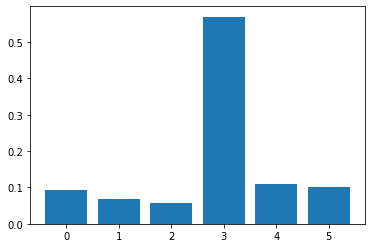

In [45]:
plt.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
plt.show()

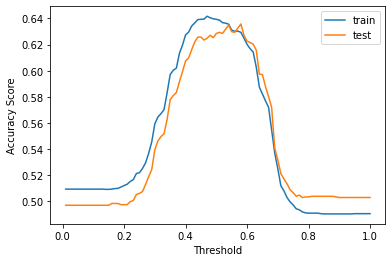

In [16]:
accuracy_test = []
accuracy_train = []
x_coods = [i*0.01 for i in range(1, 101)]
for i in range(1,101):
    thresh = i * 0.01 
    accuracy_train.append(accuracy_score(y_train, np.where(y_pred_train > thresh, 1, 0)))
    accuracy_test.append(accuracy_score(y_test, np.where(y_pred_test > thresh, 1, 0)))
    
    
plt.plot(x_coods, accuracy_train, label = 'train')    
plt.plot(x_coods, accuracy_test, label = 'test')   
plt.xlabel('Threshold')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

In [25]:
final_thresh_xgb_color_names = max(accuracy_test)
with open('final_thresh_xgb_color_names', 'wb') as fp:
    pickle.dump(final_thresh_xgb_color_names, fp)

In [26]:
clf.save_model("xgb_color_names.json")

In [27]:
#Loading model
clf = xgb.XGBRegressor()
clf.load_model("xgb_color_names.json")

# ANN

In [20]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [29]:
early_stop = EarlyStopping(monitor='val_loss', verbose=1, mode='min', patience= 75)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.7,
                              patience=7, min_lr=0.0001, verbose = 1)
# define model
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(8, )))
model.add(Dense(350, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(250, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# fit the model
model.fit(X_train, y_train, 
          validation_data=(X_test, y_test),
          epochs=500, batch_size=32, 
          verbose=1, callbacks=[early_stop, reduce_lr])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                450       
_________________________________________________________________
dense_1 (Dense)              (None, 350)               17850     
_________________________________________________________________
dropout (Dropout)            (None, 350)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 350)               1400      
_________________________________________________________________
dense_2 (Dense)              (None, 250)               87750     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               25100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0

Epoch 44/500
160/160 [==============================] - 1s 8ms/step - loss: 0.6422 - accuracy: 0.6380 - val_loss: 0.6462 - val_accuracy: 0.6403
Epoch 45/500
160/160 [==============================] - 1s 9ms/step - loss: 0.6377 - accuracy: 0.6445 - val_loss: 0.6459 - val_accuracy: 0.6403
Epoch 46/500
160/160 [==============================] - 1s 9ms/step - loss: 0.6444 - accuracy: 0.6357 - val_loss: 0.6472 - val_accuracy: 0.6394
Epoch 47/500
160/160 [==============================] - 1s 9ms/step - loss: 0.6485 - accuracy: 0.6371 - val_loss: 0.6455 - val_accuracy: 0.6408
Epoch 48/500
160/160 [==============================] - 1s 9ms/step - loss: 0.6430 - accuracy: 0.6433 - val_loss: 0.6460 - val_accuracy: 0.6431

Epoch 00048: ReduceLROnPlateau reducing learning rate to 0.00016806999628897755.
Epoch 49/500
160/160 [==============================] - 1s 9ms/step - loss: 0.6401 - accuracy: 0.6461 - val_loss: 0.6479 - val_accuracy: 0.6403
Epoch 50/500
160/160 [==============================] 

In [30]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
thresh = 0.5
print("Train\n", classification_report(y_train, np.where(y_pred_train > thresh, 1, 0)))
print(confusion_matrix(y_train, np.where(y_pred_train > thresh, 1, 0)))
print("\n\n\nTest\n",classification_report(y_test, np.where(y_pred_test > thresh, 1, 0)))
print(confusion_matrix(y_test, np.where(y_pred_test > thresh, 1, 0)))
# print("Train\n", classification_report(y_train, y_pred_train))
# print("\nTest\n",classification_report(y_test, y_pred_test))

Train
               precision    recall  f1-score   support

           0       0.65      0.65      0.65      2507
           1       0.66      0.66      0.66      2603

    accuracy                           0.66      5110
   macro avg       0.66      0.66      0.66      5110
weighted avg       0.66      0.66      0.66      5110

[[1622  885]
 [ 877 1726]]



Test
               precision    recall  f1-score   support

           0       0.65      0.62      0.63      1102
           1       0.63      0.66      0.64      1089

    accuracy                           0.64      2191
   macro avg       0.64      0.64      0.64      2191
weighted avg       0.64      0.64      0.64      2191

[[679 423]
 [370 719]]


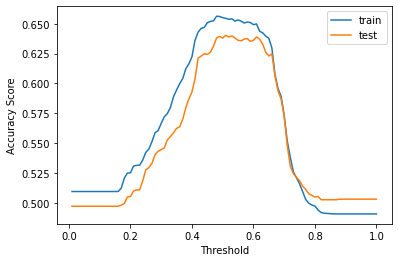

In [31]:
accuracy_test = []
accuracy_train = []
x_coods = [i*0.01 for i in range(1, 101)]
for i in range(1,101):
    thresh = i * 0.01 
    accuracy_train.append(accuracy_score(y_train, np.where(y_pred_train > thresh, 1, 0)))
    accuracy_test.append(accuracy_score(y_test, np.where(y_pred_test > thresh, 1, 0)))

    
plt.plot(x_coods, accuracy_train, label = 'train')    
plt.plot(x_coods, accuracy_test, label = 'test')   
plt.xlabel('Threshold')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

In [32]:
final_thresh_ann_color_names = max(accuracy_test)
with open('final_thresh_ann_color_names', 'wb') as fp:
    pickle.dump(final_thresh_ann_color_names, fp)

In [33]:
model.save('ann_color_names.h5')

In [34]:
model = load_model('ann_color_names.h5')

# XGBoost with RGB

In [11]:
xgb_df_rgb['overall_item'] = le_clothing.transform(xgb_df_rgb['overall_item'])
xgb_df_rgb['up_item'] = le_clothing.transform(xgb_df_rgb['up_item'])
xgb_df_rgb['down_item'] = le_clothing.transform(xgb_df_rgb['down_item'])
xgb_df_rgb['foot_item'] = le_clothing.transform(xgb_df_rgb['foot_item'])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(xgb_df_rgb.drop(columns = ['target']),
                                                    xgb_df_rgb['target'],
                                                    test_size=0.30, 
                                                    random_state=42)

# params = {
#         'min_child_weight': [1, 5, 10],
#         'gamma': [0.5, 1, 1.5, 2, 5],
#         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.6, 0.8, 1.0],
#         'max_depth': [3, 4, 5]
#         }



# clf = GridSearchCV(xgb.XGBRegressor(tree_method = "gpu_hist",
#                        use_label_encoder = False),
#                    param_grid = params, 
#                    cv=10, 
#                    scoring='accuracy',
#                    verbose=1, 
#                   n_jobs = -1)



clf = xgb.XGBRegressor(tree_method = "gpu_hist",
                       use_label_encoder = False,
                       colsample_bytree = 0.6,
                       gamma = 0.5,
                       max_depth = 3,
                       min_child_weight = 1
)
clf.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0.5, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', use_label_encoder=False,
             validate_parameters=1, verbosity=None)

In [13]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
thresh = 0.5
print("Train\n", classification_report(y_train, np.where(y_pred_train > thresh, 1, 0)))
print(confusion_matrix(y_train, np.where(y_pred_train > thresh, 1, 0)))
print("\n\n\nTest\n",classification_report(y_test, np.where(y_pred_test > thresh, 1, 0)))
print(confusion_matrix(y_test, np.where(y_pred_test > thresh, 1, 0)))
# print("Train\n", classification_report(y_train, y_pred_train))
# print("\nTest\n",classification_report(y_test, y_pred_test))

Train
               precision    recall  f1-score   support

           0       0.76      0.71      0.73      2507
           1       0.73      0.78      0.76      2603

    accuracy                           0.74      5110
   macro avg       0.74      0.74      0.74      5110
weighted avg       0.74      0.74      0.74      5110

[[1771  736]
 [ 572 2031]]



Test
               precision    recall  f1-score   support

           0       0.64      0.59      0.61      1102
           1       0.61      0.66      0.64      1089

    accuracy                           0.62      2191
   macro avg       0.62      0.62      0.62      2191
weighted avg       0.62      0.62      0.62      2191

[[646 456]
 [368 721]]


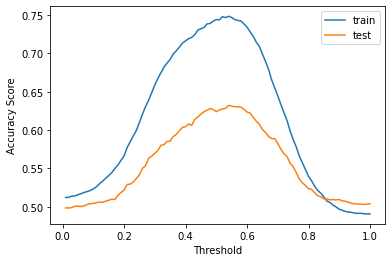

In [15]:
accuracy_test = []
accuracy_train = []
x_coods = [i*0.01 for i in range(1, 101)]
for i in range(1,101):
    thresh = i * 0.01 
    accuracy_train.append(accuracy_score(y_train, np.where(y_pred_train > thresh, 1, 0)))
    accuracy_test.append(accuracy_score(y_test, np.where(y_pred_test > thresh, 1, 0)))

    
plt.plot(x_coods, accuracy_train, label = 'train')    
plt.plot(x_coods, accuracy_test, label = 'test')   
plt.xlabel('Threshold')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

In [16]:
final_thresh_xgb_rgb = max(accuracy_test)
with open('final_thresh_xgb_rgb', 'wb') as fp:
    pickle.dump(final_thresh_xgb_rgb, fp)

In [17]:
clf.save_model("xgb_rgb.json")

In [ ]:
#Loading model
clf = xgb.XGBRegressor()
clf.load_model("xgb_rgb.json")

# ANN

In [18]:
X_train.fillna(0.0, inplace = True)
X_test.fillna(0.0, inplace = True)

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', verbose=1, mode='min', patience=75)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.95,
                              patience=7, min_lr=0.0001, verbose = 1)
# define model
model = Sequential()
model.add(Dense(20, activation='relu', input_shape=(16, )))
model.add(Dense(350, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(250, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# fit the model
model.fit(X_train, y_train, 
          validation_data=(X_test, y_test),
          epochs=500, batch_size=32, 
          verbose=1, callbacks=[early_stop, ])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 20)                340       
_________________________________________________________________
dense_24 (Dense)             (None, 350)               7350      
_________________________________________________________________
dropout_4 (Dropout)          (None, 350)               0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 350)               1400      
_________________________________________________________________
dense_25 (Dense)             (None, 250)               87750     
_________________________________________________________________
dense_26 (Dense)             (None, 100)               25100     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)              

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
thresh = 0.5
print("Train\n", classification_report(y_train, np.where(y_pred_train > thresh, 1, 0)))
print(confusion_matrix(y_train, np.where(y_pred_train > thresh, 1, 0)))
print("\n\n\nTest\n",classification_report(y_test, np.where(y_pred_test > thresh, 1, 0)))
print(confusion_matrix(y_test, np.where(y_pred_test > thresh, 1, 0)))
# print("Train\n", classification_report(y_train, y_pred_train))
# print("\nTest\n",classification_report(y_test, y_pred_test))

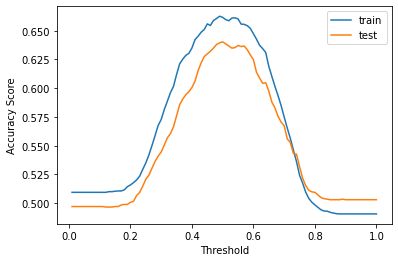

In [31]:
accuracy_test = []
accuracy_train = []
x_coods = [i*0.01 for i in range(1, 101)]
for i in range(1,101):
    thresh = i * 0.01 
    accuracy_train.append(accuracy_score(y_train, np.where(y_pred_train > thresh, 1, 0)))
    accuracy_test.append(accuracy_score(y_test, np.where(y_pred_test > thresh, 1, 0)))

    
plt.plot(x_coods, accuracy_train, label = 'train')    
plt.plot(x_coods, accuracy_test, label = 'test')   
plt.xlabel('Threshold')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

In [32]:
final_thresh_ann_rgb = max(accuracy_test)
with open('final_thresh_ann_rgb', 'wb') as fp:
    pickle.dump(final_thresh_ann_rgb, fp)

In [33]:
model.save('ann_rgb.h5')

In [ ]:
model = load_model('ann_color_names.h5')

# Trying out xgboost

In [ ]:
xgb_df = polyvore_df['list of items'].apply(pd.Series)
xgb_df['target'] = polyvore_df['target']
xgb_df

In [ ]:
for i in range(4):
    xgb_df[i] = xgb_df[i].astype('category')

In [ ]:
le0 = LabelEncoder()
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()

xgb_df[0] = le0.fit_transform(xgb_df[0])
xgb_df[1] = le1.fit_transform(xgb_df[1])
xgb_df[2] = le2.fit_transform(xgb_df[2])
xgb_df[3] = le3.fit_transform(xgb_df[3])

X_train, X_test, y_train, y_test = train_test_split(xgb_df.drop(columns = ['target']),
                                                    xgb_df['target'],
                                                    test_size=0.30, 
                                                    random_state=42)
clf = xgb.XGBClassifier(tree_method="gpu_hist",
                        enable_categorical = True,
                       use_label_encoder=True)
clf.fit(X_train, y_train)

In [ ]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train\n", confusion_matrix(y_train, y_pred_train))
print("\nTest\n",confusion_matrix(y_test, y_pred_test))

In [ ]:
# import os
# os.environ["PATH"] += os.pathsep + "C:\\Program Files\\Graphviz\\bin\\"
fig, ax = plt.subplots(figsize = (30,30))
xgb.plot_tree(clf, ax = ax)
plt.show()
